## Линейные модели. Работа с признаками

#### Линейная регрессия для задачи предсказания цены бриллианта в зависимости от его характеристик

Описание датасета [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**0. Загрузка датасета**

In [2]:
data = pd.read_csv('https://github.com/aavalina/ML/raw/832fca6a86bbcd9ce32fd45d59a03566e0349986/05_linreg_data.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**1. Обработка пропущенных значений**

In [3]:
data.isna().any().any()

False

**2. Удаление ненужных столбцов (признаков, не несущих дополнительной информации)**

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)                                   # 'Unnamed: 0' is just an index

**3. Матрица выборочных корреляций между вещественными признаками и целевой переменной для проверки выполнения линейной связи между ними**

In [5]:
data.corr(numeric_only=True)                                                      # x, y, z видна сильная корреляция друг с другом, а также с carat и price

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [6]:
data.corr(numeric_only=True)['price']                                             # carat, x, y, z коррелируют с целевой переменной больше всего

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


**4. Обработка категориальных признаков**

In [7]:
data.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [8]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**5. Разделение выборки на тренировочную и тестовую**

In [9]:
target = data['price']
target

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [10]:
data.drop(columns=['price'], inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
np.random.seed(28)
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
31229,0.31,62.0,56.0,4.38,4.36,2.71,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
22311,1.21,62.4,57.0,6.75,6.83,4.24,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
278,0.81,62.6,55.0,5.92,5.96,3.72,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6646,0.79,61.7,56.0,5.94,5.95,3.67,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


In [13]:
data_test.shape

(16182, 23)

In [14]:
data_train.shape

(37758, 23)

**6. Масштабирование вещественных признаков**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
column_names = list(data_train.columns)
numeric_features = column_names[column_names.index('carat'):column_names.index('z') + 1]
dummy_features = column_names[column_names.index('cut_Good'):column_names.index('clarity_VVS2') + 1]

In [17]:
normalizer = StandardScaler()
normalizer.fit(data_train.loc[:, numeric_features])                               # fit the normalizer to numeric features

data_train_transformed = normalizer.transform(data_train.loc[:, numeric_features])    # transform numeric features of the train data using normalizer
data_train_transformed = pd.DataFrame(data=data_train_transformed, columns=numeric_features)    # transform the result into dataframe
data_train = pd.concat([data_train_transformed, data_train.loc[:, dummy_features].reset_index(drop=True)], axis=1)    # concat with unnormalized dummy features

data_test_transformed = normalizer.transform(data_test.loc[:, numeric_features])    # transform numeric features of the test data using normalizer
data_test_transformed = pd.DataFrame(data=data_test_transformed, columns=numeric_features)    # transform the result into dataframe
data_test = pd.concat([data_test_transformed, data_test.loc[:, dummy_features].reset_index(drop=True)], axis=1)    # concat with unnormalized dummy features

data_train.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


**7. Обучение линейной регрессии**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(data_train, y_train)

print(f"Train: {mean_squared_error(y_train, lr.predict(data_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(data_test))}")

Train: 1290541.9147450614
Test: 1244765.4357158695


**8. Вывод полученных оценок коэффициентов**

In [19]:
pd.concat([pd.DataFrame(data=data_train.columns, columns=['features']), pd.DataFrame(data=lr.coef_, columns=['coefs'])], axis=1)

,features,coefs
0,carat,5338.615671
1,depth,-90.173817
2,table,-60.332280
3,x,-1100.418850
4,y,-6.458917
5,z,-34.258945
6,cut_Good,595.521080
7,cut_Ideal,846.196258
8,cut_Premium,777.769963
9,cut_Very Good,743.301360


_Как можно заметить, в основном коэффициенты находятся в диапазоне от 0 до ~1000 по модулю, а вот модули коэффициентов таких переменных как carat, color_J, все clarity оказались на порядок выше (больше на ~1000-4000). Коэффициенты фитчей x и color_I, хоть и больше основной массы по модулю, все-таки выше не на порядок, а на ~100 и ~400, т.е. находятся ближе к основной массе коэффициентов._

**9. Обучение Lasso-регрессии и Ridge-регрессии**

Как можно заметить из анализа корреляционной матрицы, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Выявленные различия в порядке коэффициентов также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Воспользуемся вторым вариантом.

Смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации минимизируется следующая функция потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

(Lasso-регрессия).

При L2-регуляризации минимизируется следующая функция потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

(Ridge-регрессия).



In [20]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=10.0, random_state=42)
ls.fit(data_train, y_train)

print(f"Train: {mean_squared_error(y_train, ls.predict(data_train))}")
print(f"Test: {mean_squared_error(y_test, ls.predict(data_test))}")

pd.concat([pd.DataFrame(data=data_train.columns, columns=['features']), pd.DataFrame(data=ls.coef_, columns=['coefs'])], axis=1)

# веса, которые до этого были порядка 2000-5000, уменьшились на несколько тысяч и теперь находятся в диапазоне до 2000, кроме коэффициента carat
# можно увидеть характерное для Лассо зануление весов некоторых признаков

Train: 1532211.8153978987
Test: 1464188.7955352117


,features,coefs
0,carat,4756.602190
1,depth,-153.122715
2,table,-109.868576
3,x,-681.275333
4,y,-0.000000
5,z,-6.279439
6,cut_Good,-0.000000
7,cut_Ideal,163.904657
8,cut_Premium,76.636591
9,cut_Very Good,90.907316


In [21]:
from sklearn.linear_model import Ridge

rd = Ridge(alpha=10.0, random_state=42)
rd.fit(data_train, y_train)

print(f"Train: {mean_squared_error(y_train, rd.predict(data_train))}")
print(f"Test: {mean_squared_error(y_test, rd.predict(data_test))}")

pd.concat([pd.DataFrame(data=data_train.columns, columns=['features']), pd.DataFrame(data=rd.coef_, columns=['coefs'])], axis=1)

# веса также уменьшились, но уменьшились не так сильно как в Lasso (здесь они уменьшились на несколько сотен)

Train: 1294769.584930516
Test: 1244928.3665845199


,features,coefs
0,carat,5286.285876
1,depth,-93.746314
2,table,-63.430106
3,x,-1062.006514
4,y,-5.916126
5,z,-33.689994
6,cut_Good,618.971148
7,cut_Ideal,873.580369
8,cut_Premium,801.950615
9,cut_Very Good,773.390190


_Регуляризация не сильно решила проблему мультиколлинеарности, т.к. по крайней мере в Ridge-регрессии веса все так же сильно отличаются друг от друга._

**10. Построение графиков измененения евклидовой нормы весов в зависимости от параметра $\alpha$**


Норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Lasso coefs norms:  [13455.300563100296, 12292.458025134265, 5822.638888104579, 3688.0769188769077, 3492.79283967223]
Ridge coefs norms:  [13571.419939815854, 13435.439664157595, 12262.96033884351, 7788.969721191524, 6424.342383063084]


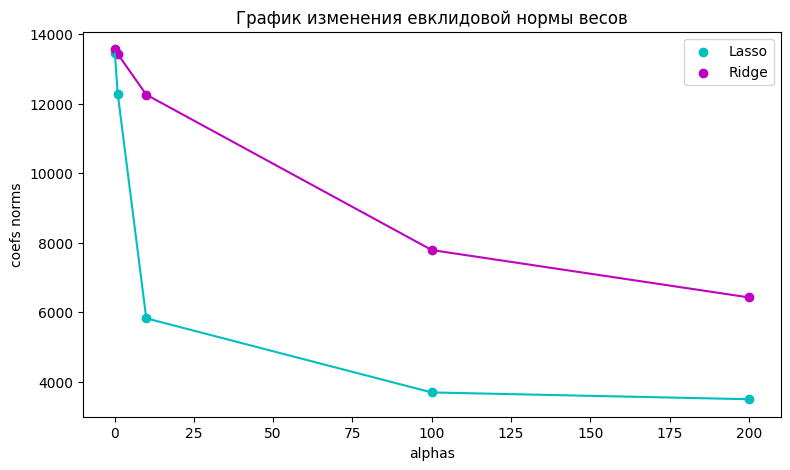

In [22]:
alphas = [0.1, 1, 10, 100, 200]
lasso_coefs_norm = []
ridge_coefs_norm = []

for alpha in alphas:
  ls = Lasso(alpha, random_state=42)
  ls.fit(data_train, y_train)
  lasso_coefs_norm.append(np.linalg.norm(ls.coef_))

  rd = Ridge(alpha, random_state=42)
  rd.fit(data_train, y_train)
  ridge_coefs_norm.append(np.linalg.norm(rd.coef_))

print('Lasso coefs norms: ', lasso_coefs_norm)
print('Ridge coefs norms: ', ridge_coefs_norm)

plt.figure(figsize=(9, 5))

plt.scatter(alphas, lasso_coefs_norm, color='c')
plt.scatter(alphas, ridge_coefs_norm, color='m')

plt.plot(alphas, lasso_coefs_norm, 'c')
plt.plot(alphas, ridge_coefs_norm, 'm')
plt.legend(['Lasso', 'Ridge'])
plt.title('График изменения евклидовой нормы весов')
plt.xlabel('alphas')
plt.ylabel('coefs norms')

plt.show()

_Очевидно, что Lasso агрессивнее уменьшает веса, т.к. значения норм весов падают быстрее (и это видно на графике). Lasso-регрессию часто используют для отбора наиболее информативных признаков, т.к. она зануляет веса не очень значимых признаков. Lasso будет маленькие веса загонять в ноль, т.к. даже у маленьких весов ошибка существенно уменьшится, если сдвинуться еще ближе к нулю._

**11. Подбор оптимального значения параметра $\alpha$ в Lasso-регрессии при помощи кросс-валидации по тренировочной выборке**



In [23]:
from sklearn.linear_model import LassoCV

ls_cv = LassoCV(alphas=alphas, cv=5, max_iter = 100000, random_state=42).fit(data_train, y_train)

matrix = ls_cv.mse_path_ # матрица ошибок, размер len(alphas) * cv
alphas_MSE = pd.concat([pd.DataFrame(data=ls_cv.alphas_, columns=['alphas']), pd.DataFrame(data=matrix)], axis=1) # .alphas_ - для определения порядка alphas, т.к. модель может использовать alphas не в том порядке, в котором они были поданы
alphas_MSE = pd.concat([alphas_MSE, pd.DataFrame(data=np.mean(matrix, axis=1), columns=['mean'])], axis=1) # усреднение ошибки для каждого значения alpha (по строкам матрицы ошибок)

print('The best alpha: ', ls_cv.alpha_)
alphas_MSE

# .alpha_ attribute of LassoCV suggests that the best alpha is 0.1,
# and we can see that the best quality has a model with the same alpha as the mean value of MSE on all folds is the lowest (1.295968e+06)

The best alpha:  0.1


,alphas,0,1,2,3,4,mean
0,200.0,2.534744e+06,2.481568e+06,2.460482e+06,2.383135e+06,2.412551e+06,2.454496e+06
1,100.0,2.333106e+06,2.275034e+06,2.272061e+06,2.182157e+06,2.207552e+06,2.253982e+06
2,10.0,1.596081e+06,1.529958e+06,1.593112e+06,1.451439e+06,1.488565e+06,1.531831e+06
3,1.0,1.339925e+06,1.297949e+06,1.343048e+06,1.257371e+06,1.252723e+06,1.298203e+06
4,0.1,1.333980e+06,1.293207e+06,1.348677e+06,1.258380e+06,1.245596e+06,1.295968e+06


**12. Обучение итоговой Lasso-регрессии с оптимальным параметром $\alpha$**

In [24]:
ls = Lasso(alpha=0.1, random_state=0)
ls.fit(data_train, y_train)

print(f"Train: {mean_squared_error(y_train, ls.predict(data_train))}")
print(f"Test: {mean_squared_error(y_test, ls.predict(data_test))}")

pd.concat([pd.DataFrame(data=data_train.columns, columns=['features']), pd.DataFrame(data=ls.coef_, columns=['coefs'])], axis=1)

Train: 1290588.8489801718
Test: 1244336.150823827


,features,coefs
0,carat,5332.422145
1,depth,-91.073033
2,table,-60.981853
3,x,-1096.815363
4,y,-5.607738
5,z,-33.944427
6,cut_Good,585.179038
7,cut_Ideal,836.160368
8,cut_Premium,767.655001
9,cut_Very Good,733.735978


_Признаки, у которых веса по модулю не очень большие (depth, table, y, z) не слишком информативны, т.к. их увеличение/уменьшение приведет к меньшему уменьшению/увеличению целевой переменной, чем признаки с большими весами (carat, x, color_I, color_J, все clarity)._

_Очевидно, что бриллиант тем дороже, чем больше в нем карат, и по весам видно, что этот признак второй по важности. Первый по важности признак имеет наибольший вес - clarity_IF, и в описании датасета эта чистота бриллианта отмечена как лучшая._

_Также можно заметить, что веса категориальных признаков возрастают с увеличением значимости значения признака (clarity, cut, color (при этом видно, что цвета отрицательно влияют на цену, и чем "хуже" цвет, тем это влияние больше)). Чем больше размеры бриллианта, тем меньше его цена (и больше всего на нее влияет длина)._

**13. Предсказания обученной Lasso-регрессии на тестовой выборке и сравнение среднеквадратичной ошибки с ошибкой обычной линейной регрессии из п.7**  

In [25]:
print(f"Lasso(0.1) on test: {mean_squared_error(y_test, ls.predict(data_test))}")
print('Classic linear regression on test:', 1244765.4357158695)

Lasso(0.1) on test: 1244336.150823827
Classic linear regression on test: 1244765.4357158695


_Ошибка обычной линейной регрессии на тестовой выборке больше (но совсем чуть-чуть, на ~430). Можно сделать вывод, что Лассо использовать лучше, потому что Лассо использует L1 регуляризацию, а регуляризация помогает избавиться от переобучения, штрафуя модель за большие веса и уменьшая их значения, а также используя только информативные признаки (хотя в данном случае модель использовала все признаки и не занулила веса неинформативных, но видимо причина в том, что коэффициент регуляризации маленький)._